In [28]:
from utils.geotif_io import readTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
from glob import glob


In [29]:
path = 'data/aster-stereo/SETP-2020/tiles-dem/tile-29-96/dems_mosaic_wgs84_subs.tif'


In [44]:
Path_imgs=glob('data/aster-stereo/SETP-2020/aster-dem/*/run-DEM.tif')
Path_imgs
print(len(Path_imgs))
Path_imgs[0:5]


70


['data/aster-stereo/SETP-2020/aster-dem/VNIR_2020.78623793/run-DEM.tif',
 'data/aster-stereo/SETP-2020/aster-dem/VNIR_2020.81913821/run-DEM.tif',
 'data/aster-stereo/SETP-2020/aster-dem/VNIR_2020.83831432/run-DEM.tif',
 'data/aster-stereo/SETP-2020/aster-dem/VNIR_2020.82459151/run-DEM.tif',
 'data/aster-stereo/SETP-2020/aster-dem/VNIR_2020.38108205/run-DEM.tif']

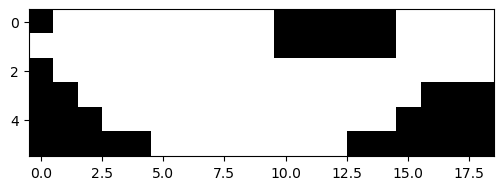

In [46]:
# for path in Path_imgs:
plt.figure(figsize=(6,6))
img, img_info = readTiff(Path_imgs[16])
plt.imshow(img, cmap='gray')



In [22]:
img, img_info = readTiff(path)



In [23]:
img_info


{'geoextent': (95.99995691864385,
  96.99997603592232,
  29.000003960398924,
  30.00002307767739),
 'geotrans': (95.99995691864385,
  0.00030864787570323074,
  0.0,
  30.00002307767739,
  0.0,
  -0.00030864787570323074),
 'geosrs': '4326',
 'row': 3240,
 'col': 3240,
 'bands': 1}

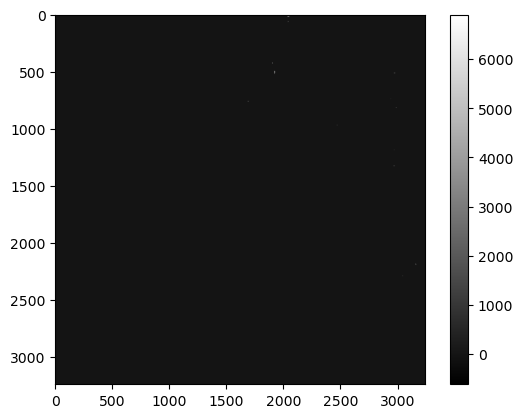

In [27]:
plt.imshow(img, cmap='gray')
plt.colorbar()
